In [ ]:
import tweepy
import pandas as pd
import re

consumer_key = "0juRogvvEdvl0dr9j8bzpKDq0"
consumer_secret = "qAfyKKHM4kIRoY01BGpSQgSsWqwZyPKAt3WD9c2PQ9u17GyOwu"
access_key = "1243580495105077248-StKjVRMQKkFEsXuU1ard3sQzWdI9fu"
access_secret = "wtxb949nni5ALpzJbfojToEKvRybOdvseqNPJJ86A4KF7"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


hashtags = ["UMemphis22","UMemphis23","UofMGrad","UofM","UniversityOfMemphis","MemBound","GTG","UMemphis","MemphisTigers","GoTigersGo","MemphisAbroad","MadeInMemphis","UofM19", "UofM20","UofM21","UofM22","UofM23"]
unique_tweets = set()
tweet_list = []

for hashtag in hashtags:
        query = hashtag
        # Loop through search results using pagination
        for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =100).pages(200):
        # Loop through tweets on the page
            for tweet in page:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in dir(tweet):
                    tweet_text = tweet.retweeted_status.full_text
                else:
                    tweet_text = tweet.full_text
                    
                tweet_text = re.sub(r"(#[\d\w]+)|(http\S+)", "", tweet_text).strip()
                
                if tweet_text not in unique_tweets:
                    unique_tweets.add(tweet_text)
                
                    tweet_list.append({
                        'content': tweet_text, 
                        'hashtag': hashtag, 
                        'timestamp': tweet.created_at,
                        'User':tweet.user.name})

df = pd.DataFrame(tweet_list)
df.head()


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
df = pd.read_csv('/content/datauomlahfin.csv')
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text
df['c_text'] = df['content'].apply(preprocess_text)
df.to_csv('prepro.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,content,hashtag,timestamp,User,clean_text
0,@bugenji Dude he went to uofm I’ve seen him a ...,UofM,2023-05-05 18:32:44+00:00,california girl,dude went uofm ive seen time
1,A lot of MSU twitter has turned into everythin...,UofM,2023-05-05 18:19:33+00:00,Shawn Douglas,lot msu twitter turned everything weve always ...
2,Had a great time at @ACS_System Donelson Eleme...,UofM,2023-05-05 18:16:25+00:00,CAESER - UofM,great time donelson elementarys career day bri...
3,Day 5\n\n \n2016 UofM Football Jordan 5 PE. N...,UofM,2023-05-05 17:11:56+00:00,J-Millz,day 5 2016 uofm football jordan 5 pe pair youl...
4,@CoopcityTV @jakep316 @TheOwl_NFL @NFL_DovKlei...,UofM,2023-05-05 17:07:22+00:00,Mictombla,doubt hear youre saying talking high d1 imo di...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df['c_text'])
vocab = vectorizer.vocabulary_
print("length of vocabulary:",len(vocab))
bag_of_words = vectorizer.transform(df['c_text'])
print(bag_of_words)
matrix=bag_of_words.toarray()
print(matrix)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['c_text'])
print('TF-IDF matrix:', tfidf_matrix.toarray())


length of vocabulary: 8297
  (0, 2501)	1
  (0, 4020)	1
  (0, 6531)	1
  (0, 7352)	1
  (0, 7693)	1
  (0, 7957)	1
  (1, 755)	1
  (1, 1202)	1
  (1, 2749)	2
  (1, 3540)	1
  (1, 4514)	1
  (1, 4959)	1
  (1, 5489)	1
  (1, 5829)	1
  (1, 7269)	1
  (1, 7552)	1
  (1, 7568)	2
  (1, 7693)	1
  (1, 7967)	1
  (1, 8031)	1
  (2, 1155)	1
  (2, 1403)	1
  (2, 1550)	1
  (2, 1934)	1
  (2, 2144)	1
  :	:
  (3377, 3332)	1
  (3377, 3461)	1
  (3377, 4109)	1
  (3377, 4544)	1
  (3377, 5106)	1
  (3378, 191)	1
  (3378, 253)	1
  (3378, 877)	1
  (3378, 2450)	1
  (3378, 3254)	1
  (3378, 4235)	1
  (3378, 4372)	1
  (3378, 5106)	1
  (3378, 6491)	1
  (3378, 7221)	1
  (3378, 8086)	1
  (3379, 2449)	1
  (3379, 2524)	1
  (3379, 2786)	1
  (3379, 4399)	1
  (3379, 4498)	1
  (3379, 4888)	1
  (3379, 5443)	1
  (3379, 7181)	2
  (3380, 2483)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
TF-IDF matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. 

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.4 MB/s eta 0:00:00


In [ ]:
!pip install keras --upgrade
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
cfier=pipeline('sentiment-analysis')
sentis=cfier(df['c_text'].tolist())
df['label']=[1 if s['label']== 'POSITIVE' else 0 for s in sentis]
df.head()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,content,hashtag,timestamp,User,clean_text,label
0,@bugenji Dude he went to uofm I’ve seen him a ...,UofM,2023-05-05 18:32:44+00:00,california girl,dude went uofm ive seen time,0
1,A lot of MSU twitter has turned into everythin...,UofM,2023-05-05 18:19:33+00:00,Shawn Douglas,lot msu twitter turned everything weve always ...,1
2,Had a great time at @ACS_System Donelson Eleme...,UofM,2023-05-05 18:16:25+00:00,CAESER - UofM,great time donelson elementarys career day bri...,1
3,Day 5\n\n \n2016 UofM Football Jordan 5 PE. N...,UofM,2023-05-05 17:11:56+00:00,J-Millz,day 5 2016 uofm football jordan 5 pe pair youl...,1
4,@CoopcityTV @jakep316 @TheOwl_NFL @NFL_DovKlei...,UofM,2023-05-05 17:07:22+00:00,Mictombla,doubt hear youre saying talking high d1 imo di...,0


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

tok = Tokenizer(num_words=5000, lower=True)
tok.fit_on_texts(df['c_text'])
X = tok.texts_to_sequences(df['c_text'])
X = pad_sequences(X, maxlen=100)
y = to_categorical(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(64, return_sequences=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
43/43 [==============================] - 12s 169ms/step - loss: 0.6594 - accuracy: 0.6113 - val_loss: 0.6203 - val_accuracy: 0.6647
Epoch 2/10
43/43 [==============================] - 9s 197ms/step - loss: 0.4745 - accuracy: 0.7803 - val_loss: 0.5523 - val_accuracy: 0.7223
Epoch 3/10
43/43 [==============================] - 7s 163ms/step - loss: 0.2406 - accuracy: 0.9050 - val_loss: 0.5971 - val_accuracy: 0.7637
Epoch 4/10
43/43 [==============================] - 9s 196ms/step - loss: 0.1232 - accuracy: 0.9527 - val_loss: 0.7741 - val_accuracy: 0.7489
Epoch 5/10
43/43 [==============================] - 8s 177ms/step - loss: 0.0703 - accuracy: 0.9726 - val_loss: 0.9645 - val_accuracy: 0.7474
Epoch 6/10
43/43 [==============================] - 8s 178ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 0.9797 - val_accuracy: 0.7474
Epoch 7/10
43/43 [==============================] - 8s 194ms/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 1.1090 - val_accuracy: 0.7504
Epoch

22/22 [==============================] - 2s 49ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       421
           1       0.71      0.62      0.66       256

    accuracy                           0.76       677
   macro avg       0.75      0.73      0.74       677
weighted avg       0.76      0.76      0.76       677

Accuracy: 0.7607090103397341
Precision: 0.7475521456743127
Recall: 0.7341152019002375
F1 Score: 0.739060299211999


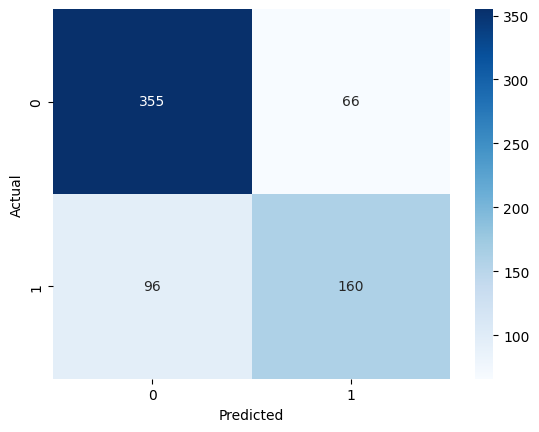

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_ps = model.predict(X_test)
y_predic = np.argmax(y_ps, axis=1)

ac = accuracy_score(np.argmax(y_test, axis=1), y_predic)
pr = precision_score(np.argmax(y_test, axis=1), y_predic, average='macro')
re = recall_score(np.argmax(y_test, axis=1), y_predic, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_predic, average='macro')

print(classification_report(np.argmax(y_test, axis=1), y_predic))

print('Accuracy:', ac)
print('Precision:', pr)
print('Recall:', re)
print('F1 Score:', f1)

cf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_predic)

sns.heatmap(cf_mx, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
s = ["I love this movie",
    "This restaurant is terrible",
    "The weather is beautiful today",
    "I'm feeling happy",
    "I'm feeling sad",
    "This product is great",
    "This product is terrible",
    "The service here is amazing",
    "The service here is awful",
    "I'm so excited to see this movie"]

n_seq = tokenizer.texts_to_sequences(s)
n_seq_pad = pad_sequences(n_seq, maxlen=200)

predi = model.predict(n_sequ_pad)

for i in range(len(s)):
    senti = "Positive" if np.argmax(predi[i]) == 1 else "Negative"
    print(s[i], ":", senti)


1/1 [==============================] - 2s 2s/step
I love this movie : Positive
This restaurant is terrible : Negative
The weather is beautiful today : Positive
I'm feeling happy : Positive
I'm feeling sad : Negative
This product is great : Positive
This product is terrible : Negative
The service here is amazing : Positive
The service here is awful : Positive
I'm so excited to see this movie : Positive
